In [1]:
import tensorflow as tf
print('Tensorflow version: {}'.format(tf.__version__))
print('Keras version: {}'.format(tf.keras.__version__))

Tensorflow version: 2.3.3
Keras version: 2.4.0


In [2]:
## get label and list sample test processed dataset to testing
import os

var_dir = r'1_datasets/processed_dataset/val'
test_dir = r'1_datasets/processed_dataset/test'

# get labels
labels = sorted(os.listdir(test_dir))
print('Labels of datasets: {}\n'.format(labels))

# get list sample
import pandas as pd
from tqdm import tqdm

def get_samples(folder=''):
    list_sample = []
    for label in os.listdir(folder):
        label_dir = os.path.join(folder, label)
        for file in tqdm(os.listdir(label_dir)):
            file_path = os.path.join(label_dir, file)
            file_path = file_path.replace('\\', '/')
            list_sample.append([file_path, label])
    return pd.DataFrame(list_sample, columns=['image', 'label'])

val_set = get_samples(var_dir)
val_set.head()
test_set = get_samples(test_dir)
test_set.head()

100%|█████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 57195.70it/s]

Labels of datasets: ['ArtDecor', 'Hitech', 'Indochina', 'Industrial', 'Scandinavian']




100%|█████████████████████████████████████████████████████████████████████████████| 340/340 [00:00<00:00, 67733.61it/s]


,image,label
0,1_datasets/processed_dataset/val/ArtDecor/ArtD...,ArtDecor
1,1_datasets/processed_dataset/val/ArtDecor/ArtD...,ArtDecor
2,1_datasets/processed_dataset/val/ArtDecor/ArtD...,ArtDecor
3,1_datasets/processed_dataset/val/ArtDecor/ArtD...,ArtDecor
4,1_datasets/processed_dataset/val/ArtDecor/ArtD...,ArtDecor


In [3]:
test_set = get_samples(test_dir)
test_set.head()

100%|█████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 49952.41it/s]


,image,label
0,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor
1,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor
2,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor
3,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor
4,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor


In [13]:
model = load_model(r'3_models/models_keras/Model2.h5')

ResourceExhaustedError: OOM when allocating tensor with shape[86528,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:RandomUniform]

In [11]:
## load all available model
import time
from tensorflow.keras.models import load_model

models_dir = r'3_models/models_keras/Model1.h5'

models = dict({})
time_load_model = []

for model in tqdm(os.listdir(models_dir)):
    # get model name
    model_name = model.split('.')[0]
    # get model path
    model_path = os.path.join(models_dir, model)
    # load model
    start_time = time.time()
    models[model_name] = load_model(model_path)
    end_time = time.time() - start_time
    time_load_model.append(end_time)
    # show message successfully
    print('Load model {} successfully in {}s!'.format(model_name, round(end_time, 2)))

print('\nAll model: {}'.format(models.keys()))

 20%|████████████████▊                                                                   | 1/5 [00:18<01:14, 18.52s/it]

Load model DenseNet201 successfully in 18.52s!


 40%|█████████████████████████████████▌                                                  | 2/5 [00:27<00:38, 12.89s/it]

Load model InceptionV3 successfully in 8.94s!


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:27<00:14,  7.16s/it]

Load model Model1 successfully in 0.33s!


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:28<00:19,  9.53s/it]


ResourceExhaustedError: OOM when allocating tensor with shape[86528,512] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:Mul]

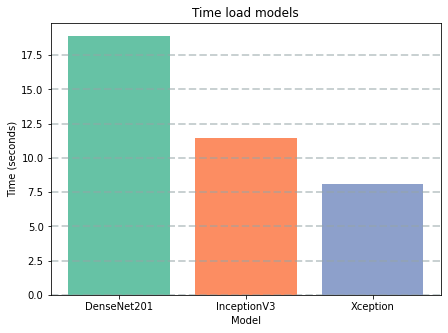

In [348]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.bar(models.keys(), time_load_model, color=plt.cm.Set2(np.arange(len(time_load_model))))
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
plt.title('Time load models')
plt.ylabel('Time (seconds)')
plt.xlabel('Model')
plt.show()

In [4]:
## show summary model DenseNet201
print('Summary DenseNet201')
models['DenseNet201'].summary()

Summary DenseNet201
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 7, 7, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1920)              0         
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               245888    
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 

In [5]:
## show summary model InceptionV3
print('Summary InceptionV3')
models['InceptionV3'].summary()

Summary InceptionV3
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
batch_normalization_94 (Batc (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 

In [6]:
## show summary model Xception
print('Summary Xception')
models['Xception'].summary()

Summary Xception
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5) 

In [367]:
## random choise 1 sample
example_df = list_sample.sample(n=1).reset_index(drop=True)
example_df.head()

,image,label
0,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor


In [368]:
## data processing (convert to array and normalize) before prediction [Methob 1]
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# use funtion ImageDataGenerator to generate image array
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_dataframe(dataframe=example_df, # sample to predict
                                            directory='',
                                            x_col="image",
                                            y_col="label",
                                            class_mode="categorical", 
                                            target_size=(224, 224),
                                            shuffle=False)
test_set.next()[0].shape

Found 1 validated image filenames belonging to 1 classes.


(1, 224, 224, 3)

In [369]:
## data processing (convert to array and normalize) before prediction [Methob 2]
import cv2

def resize_image(path, target_size=224):
    img_arr = cv2.imread(path, cv2.IMREAD_COLOR)
    img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
    img_arr = cv2.resize(img_arr, 
                         (target_size, target_size), 
                         interpolation=cv2.INTER_CUBIC) # Reshaping images to preferred size
    img_arr = img_arr.reshape(-1, target_size, target_size, 3)
    img_arr = img_arr / 255
    return img_arr

image = resize_image(example_df.iloc[0].image)
image.shape

(1, 224, 224, 3)

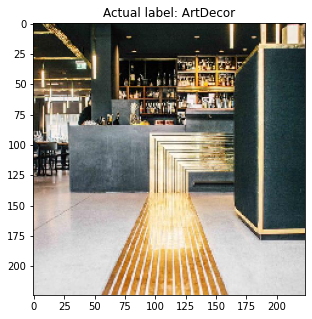

In [371]:
## show sample to predict
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
X, y = test_set.next()
plt.title('Actual label: {}'.format(example_df.iloc[0].label))
plt.imshow(X[0])
plt.show()

Predict time: 0.46s


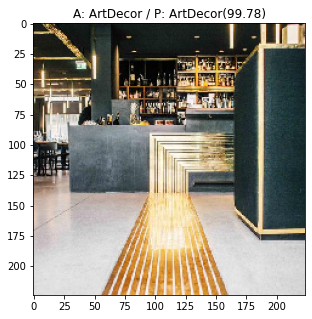

In [372]:
## try predict with trained model Xception [Method 1]
import numpy as np

start_time = time.time()
prediction_ = models['DenseNet201'].predict(test_set)[0] # test with ImageDataGenerator
prediction = np.around(prediction_ * 100, decimals=2)
end_time = round(time.time() - start_time, 2)


actual_label = example_df.iloc[0].label
predict_label = labels[prediction.argmax()]
scores = str(prediction[prediction.argmax()])
plt.figure(figsize=(5, 5))
plt.title('A: {} / P: {}({})'.format(actual_label, predict_label, scores))
plt.imshow(X[0])
print('Predict time: {}s'.format(end_time))

Predict time: 0.36s


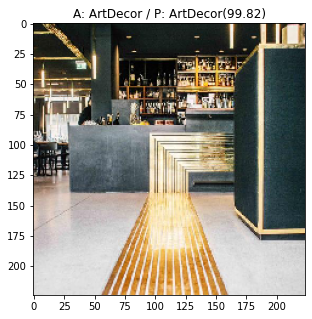

In [373]:
## try predict with trained model Xception [Method 2]
import numpy as np

start_time = time.time()
image = resize_image(example_df.iloc[0].image) 
prediction_ = models['DenseNet201'].predict(image)[0] # test with custom resize
prediction = np.around(prediction_ * 100, decimals=2)
end_time = round(time.time() - start_time, 2)


actual_label = example_df.iloc[0].label
predict_label = labels[prediction.argmax()]
scores = str(prediction[prediction.argmax()])
plt.figure(figsize=(5, 5))
plt.title('A: {} / P: {}({})'.format(actual_label, predict_label, scores))
plt.imshow(X[0])
print('Predict time: {}s'.format(end_time))

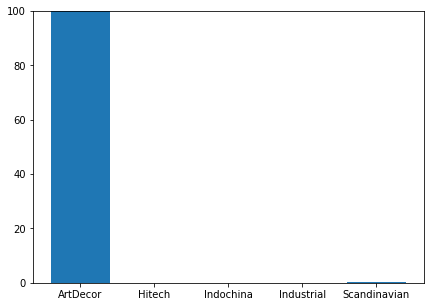

In [374]:
## show result with plot 
plt.figure(figsize=(7, 5))
plt.bar(labels, prediction)
plt.ylim(0, 100)
plt.show()

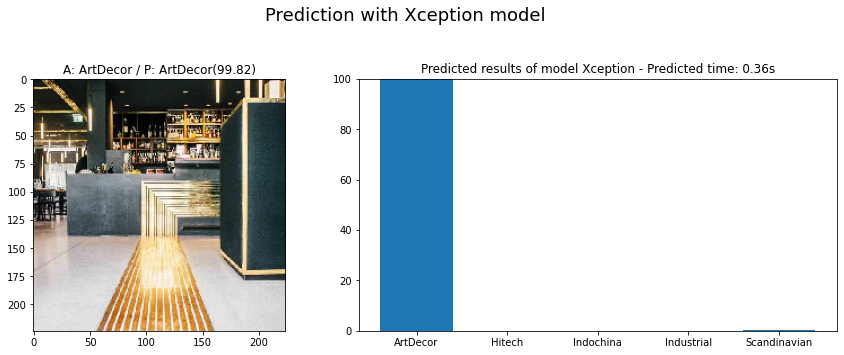

In [375]:
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 3]}, figsize=(15, 5))
fig.suptitle('Prediction with Xception model', x=0.5, y=1.0, fontsize=18, ha="center")
ax[0].set_title('A: {} / P: {}({})'.format(actual_label, predict_label, scores))
ax[0].imshow(X[0])

ax[1].set_title('Predicted results of model {} - Predicted time: {}s'.format('Xception', end_time))
ax[1].bar(labels, prediction)
ax[1].set_ylim(0, 100)
plt.subplots_adjust(top=0.8, bottom=0.1,
                    left=0.125, right=0.9,
                    wspace=0.1, hspace=0.3)
plt.show()

In [376]:
## try predict with multiple image
noSample = 5 # should be less than 10 so the display is not too long and min 2

def data_precessing(noSample=1, target_size=(224, 224)):
    sample = list_sample.sample(n=noSample).reset_index(drop=True)
    start_time = time.time()
    sample_datagen = ImageDataGenerator(rescale=1./255)
    sample_set = sample_datagen.flow_from_dataframe(dataframe=sample, directory='', # sample to predict
                                                    x_col="image", y_col="label",
                                                    class_mode="categorical",
                                                    batch_size=noSample,
                                                    target_size=target_size,
                                                    shuffle=False)
    end_time = time.time() - start_time
    print('Data processing [Method 1] time: {}s'.format(end_time))
    return sample_set, [str(l) for l in sample.label]

sample_set, actual_label = data_precessing(noSample)

Found 5 validated image filenames belonging to 3 classes.
Data processing [Method 1] time: 0.01695537567138672s


In [377]:
def multi_predicts_with_plot(samples, actual_label, model_name="Xception"):
    ## try predict with selected model
    start_time = time.time() # check start time
    predictions = models[model_name].predict(samples)
    end_time = round(time.time() - start_time, 2) # get execute time
    
    noSample = len(predictions)
    ## create fig to show plot
    fig, ax = plt.subplots(noSample, 2, gridspec_kw={'width_ratios': [2, 3]}, figsize=(15, 5 * noSample))
    # set tile for plot
    fig.suptitle('Prediction with {} model - Predicted time: {}s'.format(model_name, str(end_time)), 
                 y=0.91, fontsize=18)

    for index in range(0, noSample):
        # get predicted results
        predict_label = labels[predictions[index].argmax()]
        scores = str(round(predictions[index][predictions[index].argmax()], 2))
        
        # show predicted image
        ax[index, 0].set_title('A: {} / P: {}({})'.format(actual_label[index], predict_label, scores))
        ax[index, 0].imshow(samples[0][0][index])

        # show predict result
        ax[index, 1].set_title('Analysis results of {} model'.format(model_name))
        ax[index, 1].bar(labels, np.round(predictions[index]*100, 2))
        ax[index, 1].set_ylim(0, 100)
    
    plt.subplots_adjust(wspace=0.1, hspace=0.3) # top=0.8, bottom=0.1, left=0.125, right=0.9,
    plt.show()

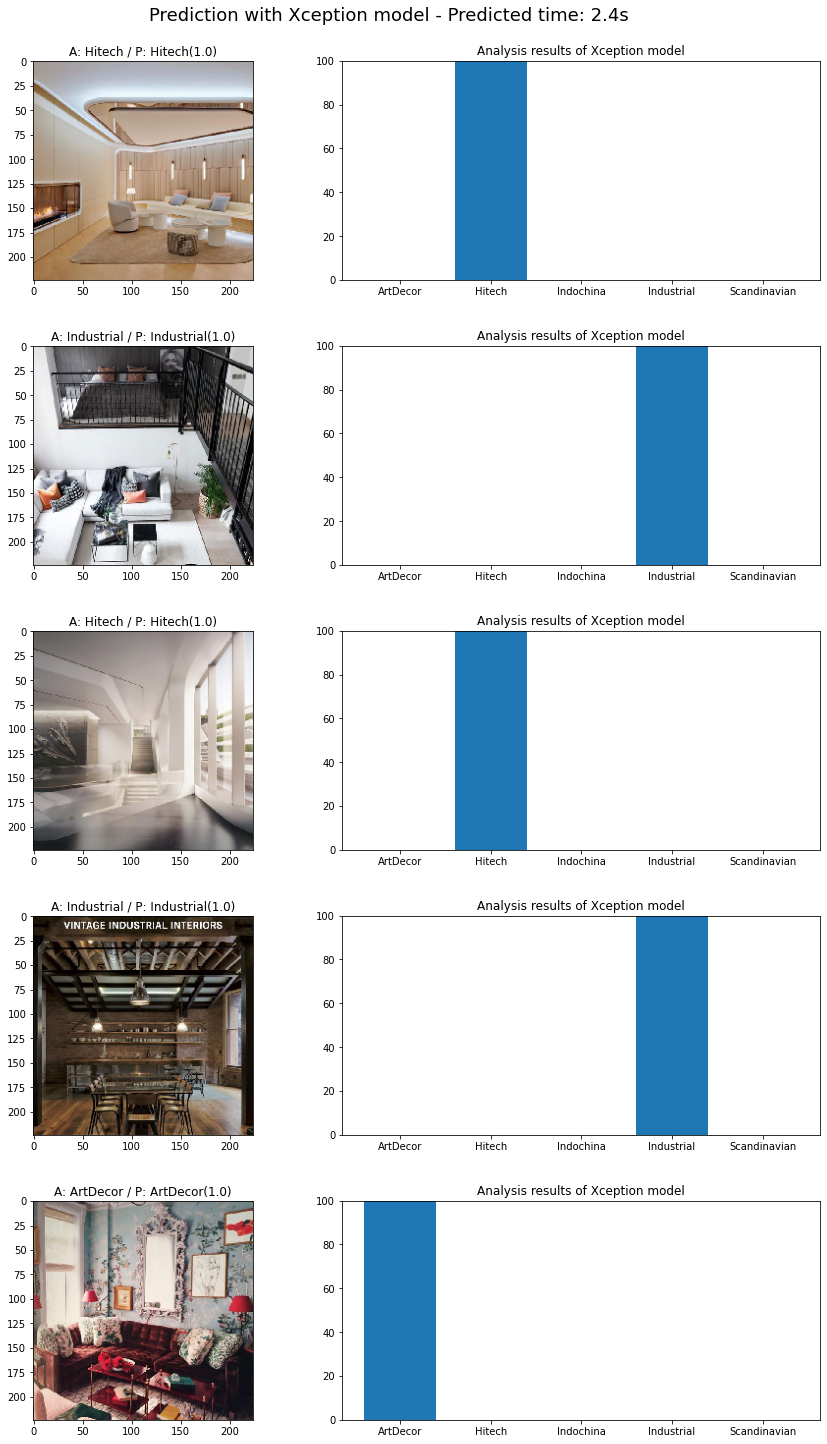

In [378]:
multi_predicts_with_plot(sample_set, actual_label, model_name='Xception')

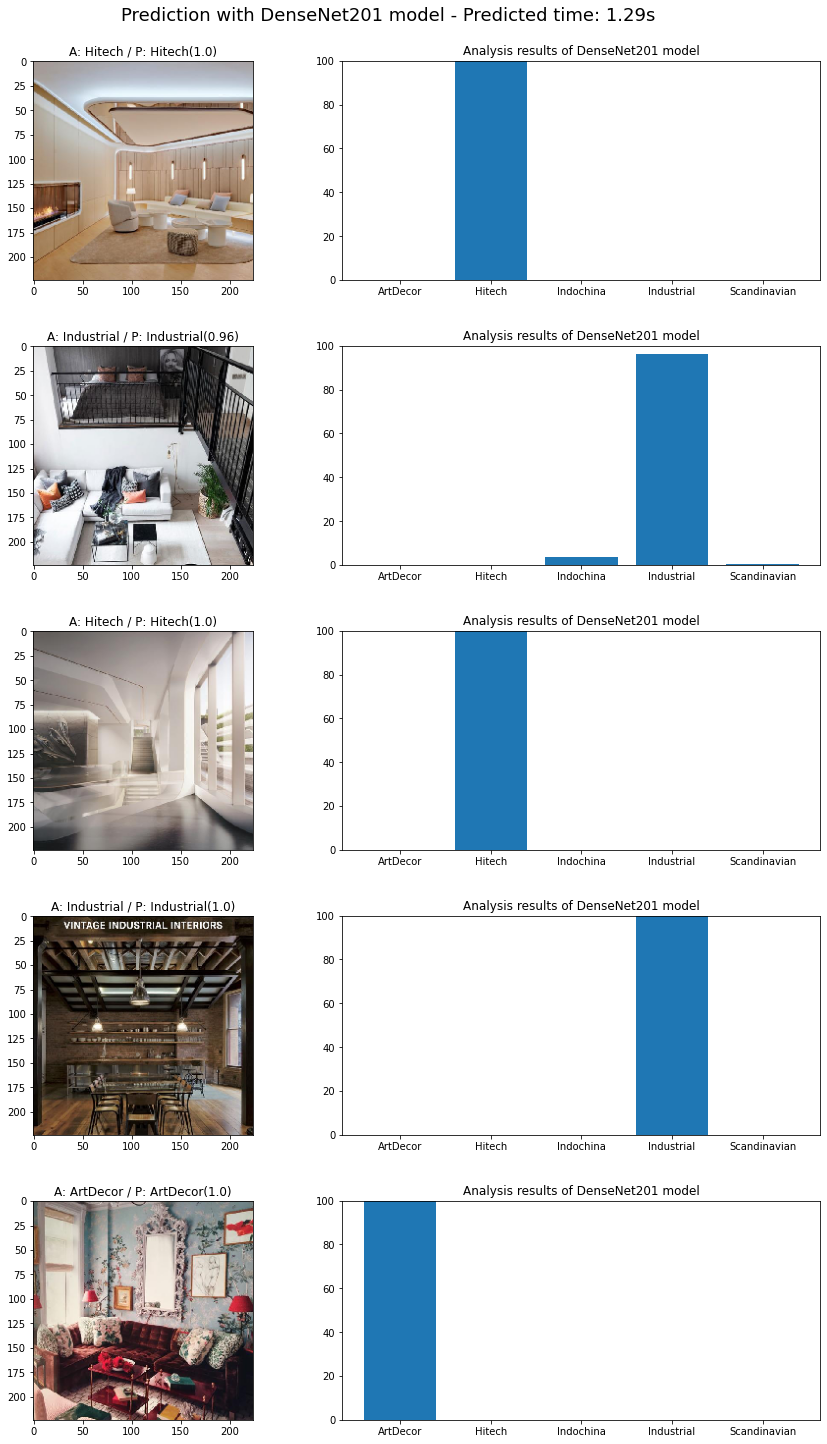

In [379]:
multi_predicts_with_plot(sample_set, actual_label, model_name='DenseNet201')

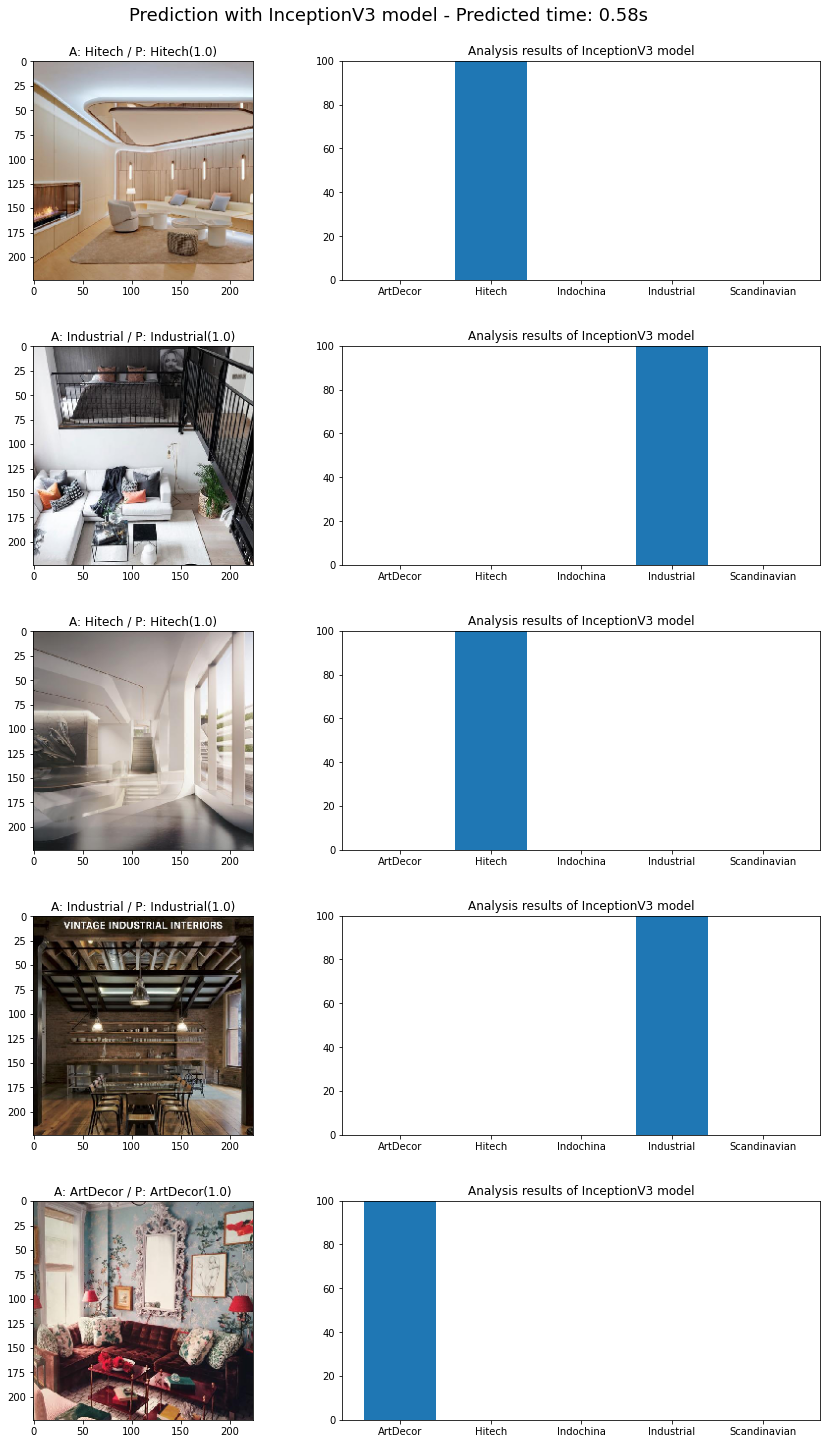

In [381]:
multi_predicts_with_plot(sample_set, actual_label, model_name='InceptionV3')

Found 5 validated image filenames belonging to 3 classes.
Data processing [Method 1] time: 0.01795196533203125s


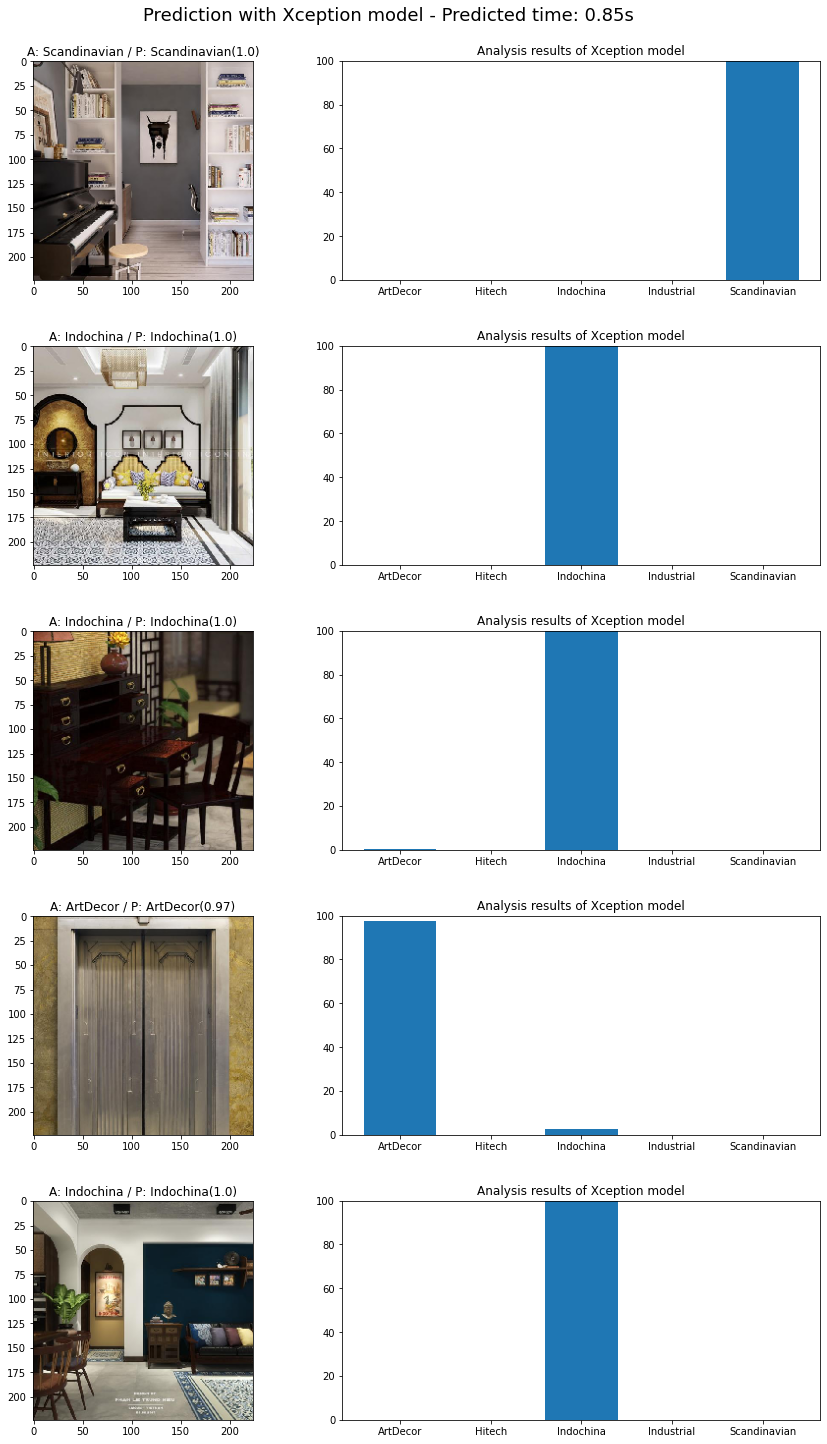

In [382]:
## try random predict with selected model
noSample = 5 # should be less than 10 so the display is not too long and min 2
sample_set, actual_label = data_precessing(noSample)
multi_predicts_with_plot(sample_set, actual_label, model_name='Xception')

In [303]:
## try to find the average time for a prediction using all test set (2500 sample)
def find_average_time():
    # get and gererate data all sample in test set
    sample_datagen = ImageDataGenerator(rescale=1./255)
    sample_set = sample_datagen.flow_from_dataframe(dataframe=list_sample, directory='', # sample to predict
                                                    x_col="image", y_col="label",
                                                    class_mode="categorical",
                                                    batch_size=noSample,
                                                    target_size=(224, 224),
                                                    shuffle=False)
    # get avg time
    predicted_avgtime = []
    for model in models:
        start_time = time.time() # set start time
        predictions = models[model].predict(sample_set)
        end_time = time.time() - start_time # get execute time
        print('Execute time of {} model: {}s'.format(model, end_time))
        predicted_avgtime.append(end_time)
    
    # return result
    return predicted_avgtime

In [304]:
predicted_avgtime = find_average_time()

Found 2500 validated image filenames belonging to 5 classes.
Execute time of DenseNet201 model: 528.7586090564728s
Execute time of InceptionV3 model: 190.51727604866028s
Execute time of Xception model: 355.33671283721924s


In [307]:
predicted_avgtime_per_sample = predicted_avgtime
predicted_avgtime 

[528.7586090564728, 190.51727604866028, 355.33671283721924]

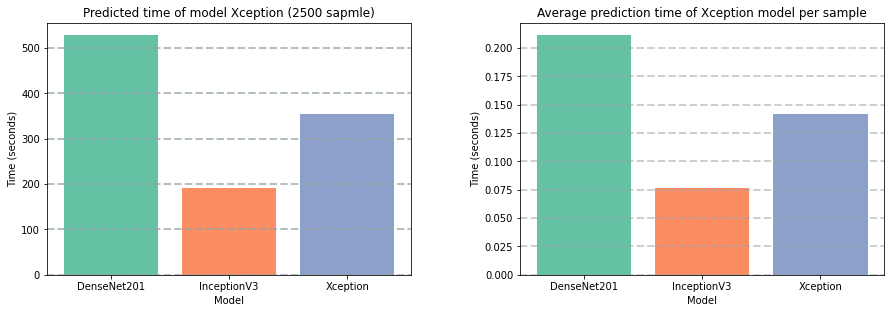

In [350]:
## show predicted time and average prediction time of models

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1]}, figsize=(15, 5))
# fig.suptitle('Prediction with Xception model', x=0.5, y=1.0, fontsize=18, ha="center")

ax[0].set_title('Predicted time of model {} (2500 sapmle)'.format('Xception'))
ax[0].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
ax[0].bar(models.keys(), predicted_avgtime, color=plt.cm.Set2(np.arange(len(predicted_avgtime))))
ax[0].set_ylabel('Time (seconds)')
ax[0].set_xlabel('Model')

ax[1].set_title('Average prediction time of {} model per sample'.format('Xception'))
ax[1].bar(models.keys(), np.round(predicted_avgtime, 2) / 2500, color=plt.cm.Set2(np.arange(len(predicted_avgtime))))
ax[1].grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.5)
ax[1].set_ylabel('Time (seconds)')
ax[1].set_xlabel('Model')

plt.subplots_adjust(top=0.8, bottom=0.1,
                    left=0.125, right=0.9,
                    wspace=0.3, hspace=0.3)
plt.show()


In [163]:
x = [[1, 2, 3],
     [1, 2, 3],
     [1, 2, 3]]
np.sum(x, axis=0) / len(x)

array([1., 2., 3.])

In [26]:

def predict(model, image_path):
    image = load_img(image_path, color_mode='rgb', target_size=(224, 224))
    input_arr = img_to_array(image)
    input_arr = np.array([input_arr]) / 255  # Convert single image to a batch.
    return model.predict(input_arr)
    
def results_models(models, image_path):
    results = []
    for model in models:    
        results.append(predict(model, image_path))
    return results
    
def hard_voting(results):
    results = np.argmax(results, axis=-1).flatten()
#     print(results)
    return np.bincount(results).argmax()

def soft_voting(results):
    sum_prob = np.zeros(5)
    for result in results:
        sum_prob = sum_prob + result
    return np.argmax(sum_prob)

In [31]:
image_path = r'D:/Desktop/Test/Hitech.jpg'
# print([LABELS[np.argmax(x)] for x in results])
results = results_models(models, image_path)
print(r'Result Hard Voting : ', LABELS[hard_voting(results)])
print(r'Result Soft Voting : ', LABELS[soft_voting(results)])

['Hitech', 'Hitech', 'Hitech', 'Hitech']
Result Hard Voting :  Hitech
Result Soft Voting :  Hitech


In [32]:
predict(model_ViN, r'D:/Desktop/Test/Hitech.jpg')

array([[6.5384171e-04, 9.9425173e-01, 2.5014953e-07, 5.0901799e-03,
        4.0676700e-06]], dtype=float32)

In [4]:
## get label and list sample test processed dataset to testing
import os

var_dir = r'1_datasets/processed_dataset/val'
test_dir = r'1_datasets/processed_dataset/test'

# get labels
labels = sorted(os.listdir(test_dir))
print('Labels of datasets: {}\n'.format(labels))

# get list sample
import pandas as pd
from tqdm import tqdm

def get_samples(folder=''):
    list_sample = []
    for label in os.listdir(folder):
        label_dir = os.path.join(folder, label)
        for file in tqdm(os.listdir(label_dir)):
            file_path = os.path.join(label_dir, file)
            file_path = file_path.replace('\\', '/')
            list_sample.append([file_path, label])
    return pd.DataFrame(list_sample, columns=['image', 'label'])

val_set = get_samples(var_dir)
val_set.head()
test_set = get_samples(test_dir)
test_set.head()

  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

Labels of datasets: ['ArtDecor', 'Hitech', 'Indochina', 'Industrial', 'Scandinavian']



100%|█████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 71472.70it/s]


,image,label
0,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor
1,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor
2,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor
3,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor
4,1_datasets/processed_dataset/test/ArtDecor/Art...,ArtDecor


In [10]:
model_ = tf.lite.Interpreter(model_path="3_models/models_tflite/Xception.tflite")
model_.allocate_tensors()

In [9]:
os.listdir('3_models/models_tflite')

['DenseNet201.tflite',
 'InceptionV3.tflite',
 'Model1.tflite',
 'Model2.tflite',
 'Xception.tflite']

In [14]:
for x in len(test_set):
    input_details = model_.get_input_details()
    output_details = model_.get_output_details()
    model_.set_tensor(input_details[0]['index'], image)
    model_.invoke()
    output = model_.get_tensor(output_details[0]['index'])
    print(x.iloc(0).image)

AttributeError: 'str' object has no attribute 'iloc'